## LIBRERIAS

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas_ta as ta 
import pandas as pd
from binance.client import Client
from dotenv import load_dotenv
import os
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
from backtesting import Strategy, Backtest
import numpy as np
from binance.enums import HistoricalKlinesType
import pandas_montecarlo


## OBTENCIÓN DE DATOS SPOT


In [19]:
# def save_data(symbol,interval,start_date,end_date):
#     api_key = os.getenv('PUBLIC2')
#     secret = os.getenv('SECRET2')

#     load_dotenv()
#     client = Client(api_key,secret)

#     history = client.get_historical_klines(symbol = symbol, interval = interval, start_str = start_date, end_str=end_date)
#     df = pd.DataFrame(data = history)
#     clean_df = df.drop(columns=[0,7,8,9,10,11])
#     clean_df.columns = ['Open','High','Low','Close','Volume','time']
#     clean_df['time'] = pd.to_datetime(clean_df['time'], unit='ms')
#     dict_cols = {'Open':float, 'High':float, 'Low':float, 'Close':float,'Volume':float}
#     newdf = clean_df.astype(dict_cols)
#     newdf.set_index('time', inplace=True)
    
#     return newdf

# df1 = save_data(symbol='ADAUSDT',interval='1h',start_date='13 Aug, 2018',end_date='13 Sep, 2021')
# df1

## OBTENCIÓN DE DATOS FUTUROS

In [2]:
load_dotenv()

public = os.getenv('PUBLIC1')
private = os.getenv('SECRET1')

def save_data(symbol,interval,start_date,end_date):
    
    
    client = Client(public,private)

    history = client.get_historical_klines_generator(symbol = symbol, interval = interval, start_str = start_date, end_str=end_date,klines_type=HistoricalKlinesType.FUTURES)
    df = pd.DataFrame(data = history)
    clean_df = df.drop(columns=[0,7,8,9,10,11])
    clean_df.columns = ['Open','High','Low','Close','Volume','time']
    clean_df['time'] = pd.to_datetime(clean_df['time'], unit='ms')
    dict_cols = {'Open':float, 'High':float, 'Low':float, 'Close':float,'Volume':float}
    newdf = clean_df.astype(dict_cols)
    newdf.set_index('time', inplace=True)
    
    return newdf


df1 = save_data(symbol='BTCUSDT',interval='1h', start_date='31 Jan, 2020', end_date='17 Feb, 2022') # si es BTC, se debe dividir el DF por 100000000 satoshis
df = save_data(symbol='BTCUSDT',interval='1h', start_date='31 Jan, 2020', end_date='17 Oct, 2022') # si es BTC, se debe dividir el DF por 100000000 satoshis


In [3]:
df1['ATR'] = df1.ta.atr()
df1.dropna(inplace=True)
df1 = df1/100000000

In [4]:
df1

Open      High       Low     Close    Volume  \
time                                                                        
2020-01-31 14:59:59.999  0.000093  0.000093  0.000092  0.000093  0.000056   
2020-01-31 15:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000054   
2020-01-31 16:59:59.999  0.000093  0.000094  0.000093  0.000093  0.000085   
2020-01-31 17:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000048   
2020-01-31 18:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000036   
...                           ...       ...       ...       ...       ...   
2022-02-16 20:59:59.999  0.000442  0.000444  0.000441  0.000441  0.000090   
2022-02-16 21:59:59.999  0.000441  0.000442  0.000438  0.000441  0.000065   
2022-02-16 22:59:59.999  0.000441  0.000441  0.000439  0.000440  0.000052   
2022-02-16 23:59:59.999  0.000440  0.000442  0.000438  0.000439  0.000073   
2022-02-17 00:59:59.999  0.000439  0.000441  0.000438  0.000441  0.000070   

                                  ATR  
time                                   
2020-01-31 14:59:59.999  6.859071e-07  
2020-01-31 15:59:59.999  6.914566e-07  
2020-01-31 16:59:59.999  7.228740e-07  
2020-01-31 17:59:59.999  6.999330e-07  
2020-01-31 18:59:59.999  6.814021e-07  
...                               ...  
2022-02-16 20:59:59.999  3.333684e-06  
2022-02-16 21:59:59.999  3.314850e-06  
2022-02-16 22:59:59.999  3.218789e-06  
2022-02-16 23:59:59.999  3.226733e-06  
2022-02-17 00:59:59.999  3.196538e-06  

[17939 rows x 6 columns]

In [5]:
df /= 100000000
df['ATR'] = df.ta.atr()
df.dropna(inplace=True)

In [6]:
df

Open      High       Low     Close    Volume  \
time                                                                        
2020-01-31 14:59:59.999  0.000093  0.000093  0.000092  0.000093  0.000056   
2020-01-31 15:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000054   
2020-01-31 16:59:59.999  0.000093  0.000094  0.000093  0.000093  0.000085   
2020-01-31 17:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000048   
2020-01-31 18:59:59.999  0.000093  0.000093  0.000093  0.000093  0.000036   
...                           ...       ...       ...       ...       ...   
2022-10-16 20:59:59.999  0.000194  0.000194  0.000193  0.000193  0.000313   
2022-10-16 21:59:59.999  0.000193  0.000194  0.000191  0.000191  0.000233   
2022-10-16 22:59:59.999  0.000191  0.000194  0.000191  0.000193  0.000311   
2022-10-16 23:59:59.999  0.000193  0.000193  0.000192  0.000193  0.000128   
2022-10-17 00:59:59.999  0.000193  0.000193  0.000192  0.000192  0.000131   

                                  ATR  
time                                   
2020-01-31 14:59:59.999  6.859071e-07  
2020-01-31 15:59:59.999  6.914566e-07  
2020-01-31 16:59:59.999  7.228740e-07  
2020-01-31 17:59:59.999  6.999330e-07  
2020-01-31 18:59:59.999  6.814021e-07  
...                               ...  
2022-10-16 20:59:59.999  7.178047e-07  
2022-10-16 21:59:59.999  8.538901e-07  
2022-10-16 22:59:59.999  9.691837e-07  
2022-10-16 23:59:59.999  9.639563e-07  
2022-10-17 00:59:59.999  9.641023e-07  

[23747 rows x 6 columns]

## ESTRATEGIA VWAP & RSI

In [7]:
'''
Lógica de estrategia:
Cuando el precio de cierre de la última vela es mayor al VWAP y el RSI cruza por debajo de 30, se abre una posición larga.
Cuando el precio de cierre de la última vela es menor al VWAP y el RSI cruza por encima de 70, se abre una posición corta.
'''

class MyStrat(Strategy):
    
    riskpct = 0.02
    rsi_window = 4
    os = 25
    ob = 70
    slatrratio = 1.5
    tpslratio = 1.5
    
    def init(self):
        super().init()

        self.vwap = self.I(lambda: ta.vwap(self.data.High.s, self.data.Low.s, self.data.Close.s, self.data.Volume.s, anchor='W'))
        self.rsi = self.I(lambda: ta.rsi(self.data.Close.s, length=self.rsi_window))

    def next(self):
        super().next()
        slatr = self.data.ATR[-1] * self.slatrratio
        price = self.data.Close[-1]
        
        # if self.position:
        #     self.position.close()
        
        if len(self.trades) > 0:
            if self.trades[-1].is_long and self.rsi >= self.ob and price < self.vwap:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.rsi <= self.os and price > self.vwap:
                self.trades[-1].close()
            
        if self.rsi <= self.os and price > self.vwap:
            sl1 = price - slatr
            tp1 = price + (slatr * self.tpslratio)
            #self.position.close()       
            
            self.buy(sl = sl1, tp = tp1, size = self.riskpct) 
            
        elif self.rsi >= self.ob and price < self.vwap:
            sl2 = price + slatr
            tp2 = price - (slatr * self.tpslratio)  
            #self.position.close()

            self.sell(sl = sl2, tp = tp2, size = self.riskpct)

## RESULTADOS

In [8]:
# --------------------------------Stats--------------------------------
bt = Backtest(df1, MyStrat, cash=100000, margin=1/1, commission = 0.0006, trade_on_close=True, hedging=True)
stat = bt.run()
print(stat)
# print(f'Ret/DD Ratio: {retDD_ratio(stat)}')

# --------------------------------Plot---------------------------------
# plot = bt.plot(plot_volume=False)
# print(plot)

# --------------------------------Trades-------------------------------
trades_size = stat['_trades']#['Size'] 
print(trades_size) # shows the size of the trades
# #plt.bar(trades_size, height=trades_size.count())

Start                     2020-01-31 14:59...
End                       2022-02-17 00:59...
Duration                    747 days 10:00:00
Exposure Time [%]                   35.219354
Equity Final [$]                108974.626145
Equity Peak [$]                 109276.335672
Return [%]                           8.974626
Buy & Hold Return [%]              375.000323
Return (Ann.) [%]                    4.277179
Volatility (Ann.) [%]                2.245386
Sharpe Ratio                         1.904874
Sortino Ratio                        3.392663
Calmar Ratio                         2.462269
Max. Drawdown [%]                   -1.737088
Avg. Drawdown [%]                   -0.114272
Max. Drawdown Duration      261 days 19:00:00
Avg. Drawdown Duration        4 days 05:00:00
# Trades                                 1067
Win Rate [%]                        48.172446
Best Trade [%]                      20.216913
Worst Trade [%]                     -5.684979
Avg. Trade [%]                    

## MONTECARLO ANALISIS

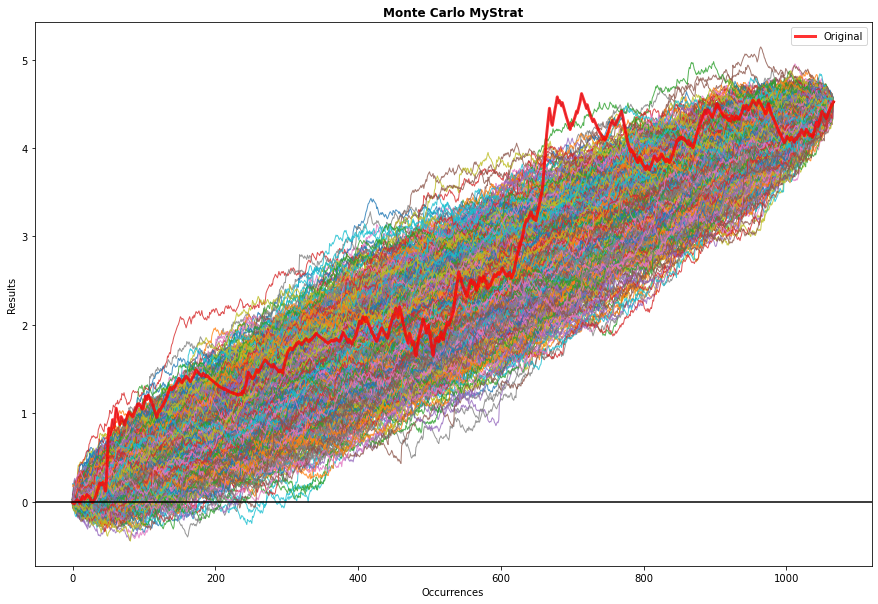

Estadisticas de la simulación: {'min': 4.523749457935958, 'max': 4.523749457935987, 'mean': 4.52374945793599, 'median': 4.523749457935973, 'std': 1.7644747204967998e-14, 'maxdd': -0.4470722030463129, 'bust': 0.229, 'goal': 0.771}
Estadisticas DD Max: {'min': -0.4470722030463129, 'max': -9.014482631508614e-05, 'mean': -0.07877139827692656, 'median': -0.056912067661223975, 'std': 0.07247229479223259}


In [9]:
def montecarlo(statistics):
    
    mc = statistics._trades['ReturnPct'].montecarlo(sims=1000, bust = -0.1, goal = 0.90)
    mc.plot(title = 'Monte Carlo MyStrat', figsize = (15,10))
    print(f'Estadisticas de la simulación: {mc.stats}')
    print(f'Estadisticas DD Max: {mc.maxdd}')
    
montecarlo(stat)

## WALK FORWARD OPTIMIZATION

In [14]:


def walk_forward(strategy, data, warmup_bars, lookback_bars, validation_bars, cash = 1000000, commission = 0.0006):
    
    stats_master = []
    
    for i in range(lookback_bars + warmup_bars, len(data), validation_bars):
        
        training_data = data.iloc[i - lookback_bars - warmup_bars : i]
        validation_data = data.iloc[i - warmup_bars : i + validation_bars]
        
        bt_training = Backtest(training_data, 
                            strategy, 
                            cash = cash, 
                            commission = commission, 
                            trade_on_close = True, 
                            hedging = True)
        
        stats_training = bt.optimize(
                            rsi_window = range(2, 14, 2),
                            ob = range(65, 95, 5),
                            os = range(5, 35, 5),
                            slatrratio = list(np.arange(1.5, 3.0, 0.5)),
                            tpslratio = list(np.arange(1.5, 4.0, 0.5)),
                            maximize = 'Calmar Ratio')
        
        rsi_window = stats_training._strategy.rsi_window
        ob = stats_training._strategy.ob
        os = stats_training._strategy.os
        slatrratio = stats_training._strategy.slatrratio
        tpslratio = stats_training._strategy.tpslratio
        
        bt_validation = Backtest(validation_data, 
                            strategy, 
                            cash = cash, 
                            commission = commission, 
                            trade_on_close = True, 
                            hedging = True)
        
        stats_validation = bt_validation.run(
                            rsi_window = rsi_window,
                            ob = ob,
                            os = os,
                            slatrratio = slatrratio,
                            tpslratio = tpslratio)
        
        #montecarlo = stats_validation._trades['ReturnPct'].montecarlo(sims=1000, bust = -0.1, goal = 0.95)
        #montecarlo.plot(title = 'Monte Carlo MyStrat', figsize = (15,10))
        
        
        stats_master.append(stats_validation)
        
        
        
    return stats_master
        
# ---------------------------------Resultados---------------------------------

training_days = 290 # Cuántos días se quiere usar para entrenar el modelo? (se recomienda un 70% del total de los datos) (30% del dataset full)
timeframe = 24 # Cuántas horas tiene un dia? (este valor depende del timeframe que se esté usando, ej: si uso TF de 1min, un dia tiene 1440 minutos)
validation_days = 90 # Cuántos días se quiere usar para validar el modelo? (se recomienda un 30% del total de los datos) (9% del dataset full)

lookback_bars = training_days * timeframe
validation_bars = validation_days * timeframe
warmup_bars = 0 # Cuántas horas se requiere de warmup para el modelo? (se recomienda ver donde comienza a hacer cálculos los indicadores de la estrategia)

stats = walk_forward(MyStrat, df, warmup_bars = warmup_bars, lookback_bars = lookback_bars, validation_bars = validation_bars)


/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

## MONTECARLO WF - RUNS

In [15]:
len(stats)

8

In [16]:
print(stats[0])
print('-'*50)
print(stats[1])
print('-'*50)
print(stats[2])
print('-'*50)
print(stats[3])
print('-'*50)
print(stats[4])
print('-'*50)
print(stats[5])
print('-'*50)
print(stats[6])
print('-'*50)
print(stats[7])


Start                     2020-11-16 14:59...
End                       2021-02-14 13:59...
Duration                     89 days 23:00:00
Exposure Time [%]                   36.712963
Equity Final [$]               1001588.989457
Equity Peak [$]                1007800.762233
Return [%]                           0.158899
Buy & Hold Return [%]              197.980976
Return (Ann.) [%]                    0.638868
Volatility (Ann.) [%]                2.769186
Sharpe Ratio                         0.230706
Sortino Ratio                        0.293207
Calmar Ratio                          0.48051
Max. Drawdown [%]                   -1.329564
Avg. Drawdown [%]                   -0.153032
Max. Drawdown Duration       35 days 12:00:00
Avg. Drawdown Duration        4 days 04:00:00
# Trades                                  126
Win Rate [%]                        44.444444
Best Trade [%]                       7.540051
Worst Trade [%]                     -5.598886
Avg. Trade [%]                    

## IMPRIMIR CADA UNO DE LOS MONTECARLOS DE LOS RESULTADOS DEL WF

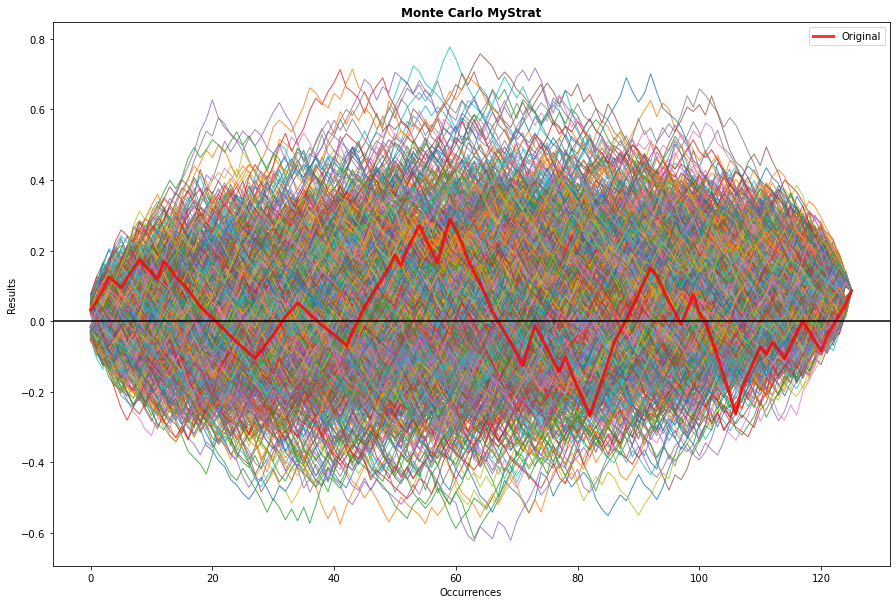

Estadisticas de la simulación: {'min': 0.08671819229307731, 'max': 0.08671819229307731, 'mean': 0.0867181922930769, 'median': 0.08671819229307731, 'std': 4.1654195730688197e-16, 'maxdd': -0.6227694757838746, 'bust': 0.714, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.6227694757838746, 'max': -0.0012819900565906872, 'mean': -0.19241583671096746, 'median': -0.17468587150038678, 'std': 0.12095121021626312}
 Montecarlo run 1: None


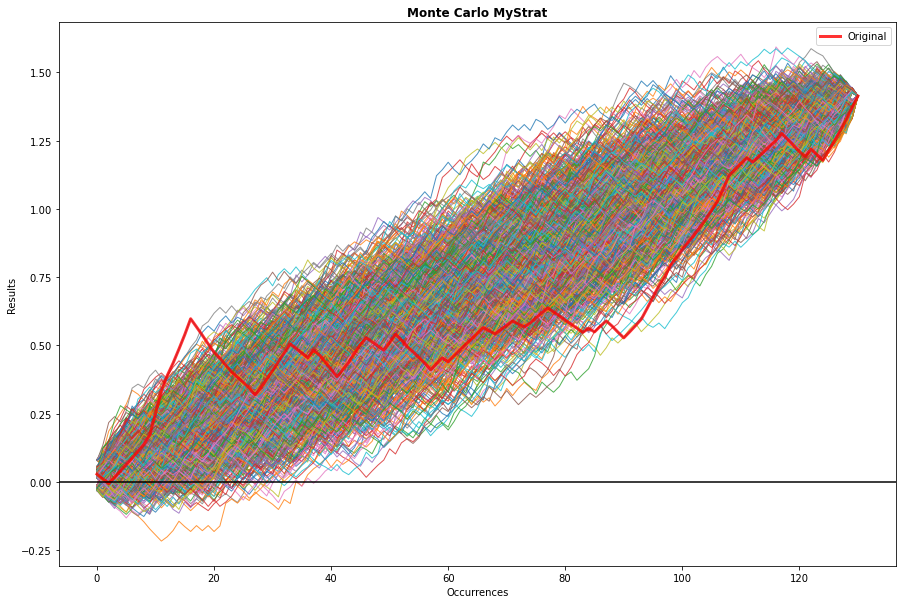

Estadisticas de la simulación: {'min': 1.4129200094454166, 'max': 1.4129200094454188, 'mean': 1.4129200094453966, 'median': 1.4129200094454177, 'std': 2.1037895951692567e-14, 'maxdd': -0.2161203187117604, 'bust': 0.013, 'goal': 0.987}
Estadisticas DD Max: {'min': -0.2161203187117604, 'max': -0.00022253055576315628, 'mean': -0.03557528937581351, 'median': -0.02737053317036714, 'std': 0.025268329383443287}
 Montecarlo run 2: None


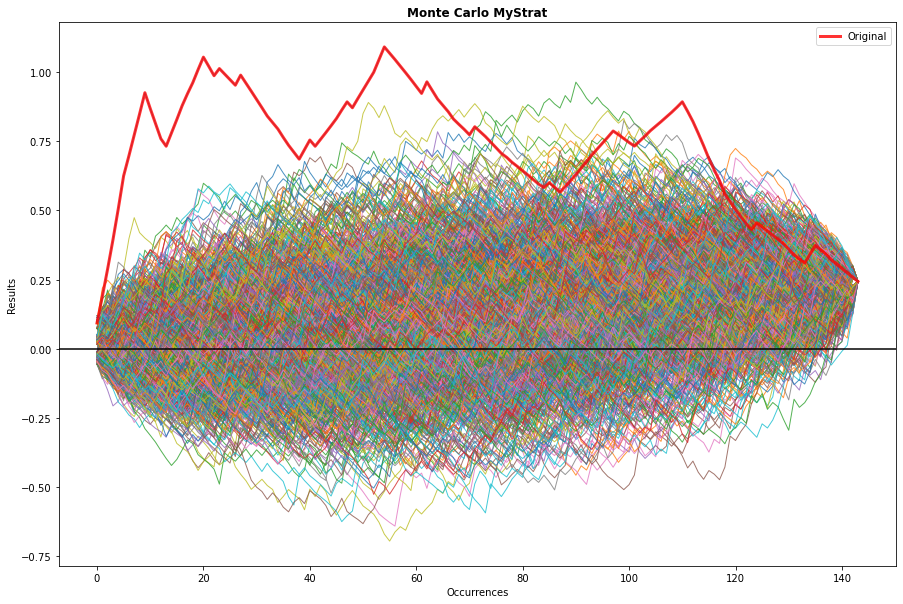

Estadisticas de la simulación: {'min': 0.24306560314207182, 'max': 0.24306560314207182, 'mean': 0.24306560314207107, 'median': 0.24306560314207182, 'std': 7.497755231523875e-16, 'maxdd': -0.6956687815635325, 'bust': 0.677, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.6956687815635325, 'max': -0.00029219600608232366, 'mean': -0.1809407461613422, 'median': -0.15520564234174122, 'std': 0.12198554241896536}
 Montecarlo run 3: None


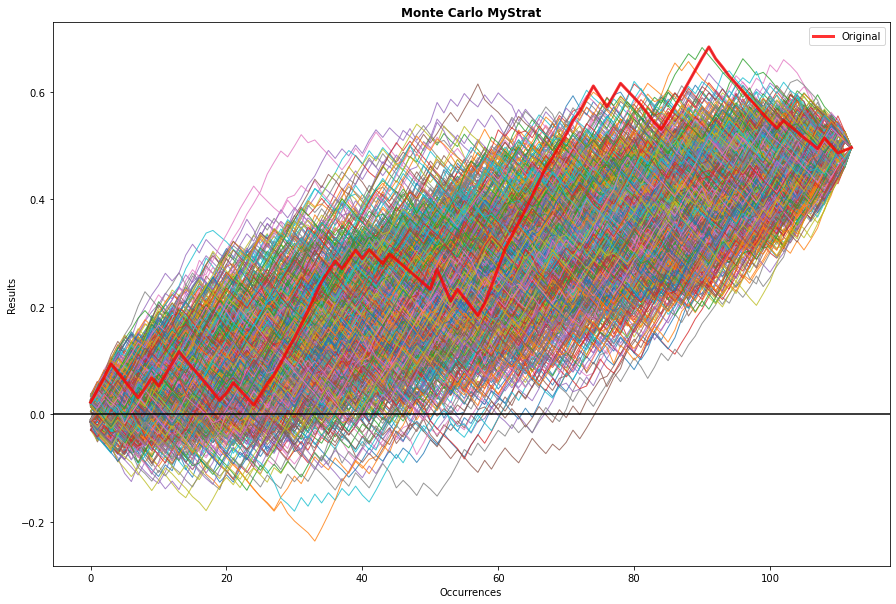

Estadisticas de la simulación: {'min': 0.4957341890502889, 'max': 0.4957341890502889, 'mean': 0.4957341890502813, 'median': 0.4957341890502889, 'std': 7.553294159164792e-15, 'maxdd': -0.2362483874773358, 'bust': 0.031, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.2362483874773358, 'max': -7.842724167872461e-05, 'mean': -0.03677078646302842, 'median': -0.02954586108963303, 'std': 0.03008547745667398}
 Montecarlo run 4: None


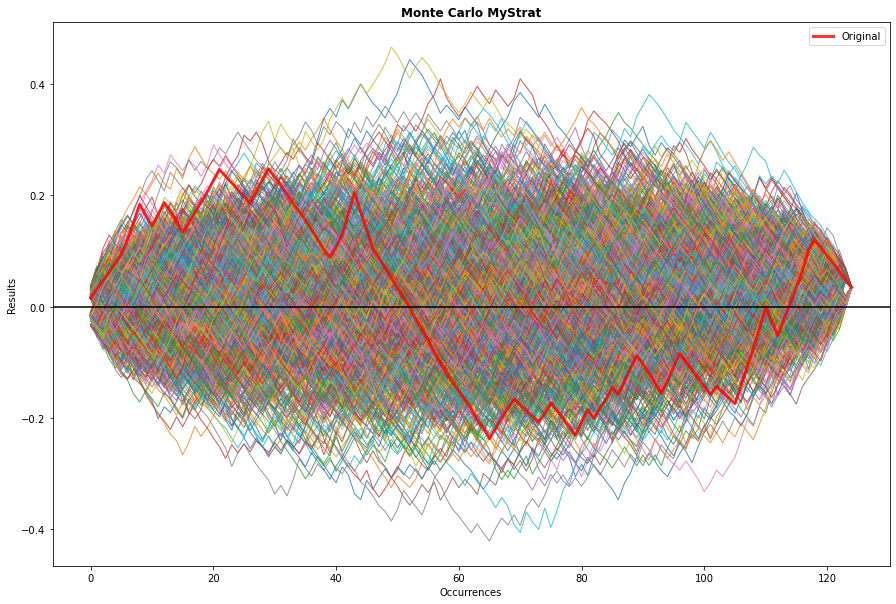

Estadisticas de la simulación: {'min': 0.03447537917109744, 'max': 0.03447537917109744, 'mean': 0.03447537917109792, 'median': 0.03447537917109744, 'std': 4.790232509029143e-16, 'maxdd': -0.42140311824753396, 'bust': 0.555, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.42140311824753396, 'max': -0.0009601450599693306, 'mean': -0.11967692651042958, 'median': -0.10856280272940305, 'std': 0.0713652654904849}
 Montecarlo run 5: None


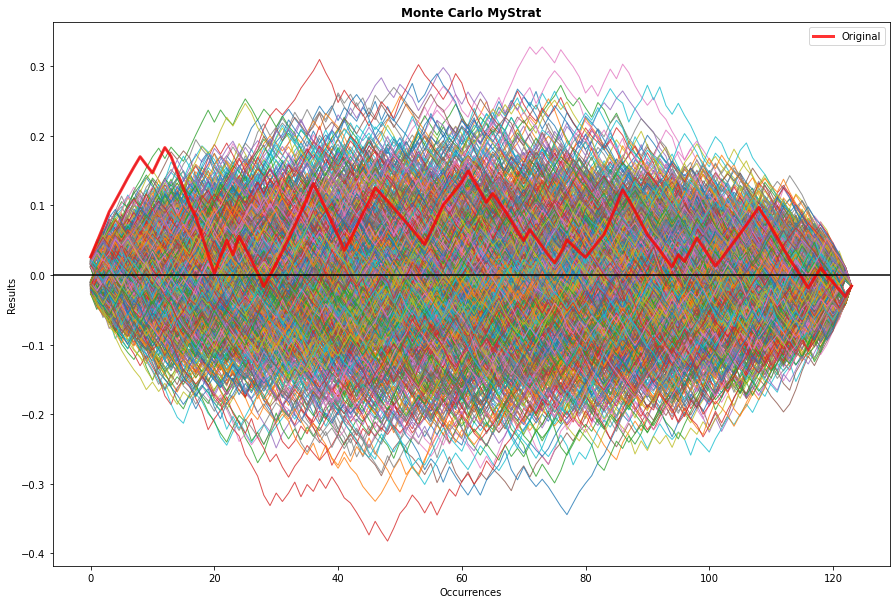

Estadisticas de la simulación: {'min': -0.015846014845104617, 'max': -0.015846014845104617, 'mean': -0.015846014845104513, 'median': -0.015846014845104617, 'std': 1.0413548932672049e-16, 'maxdd': -0.3826376925895262, 'bust': 0.532, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.3826376925895262, 'max': -0.015846014845104617, 'mean': -0.11431569387888092, 'median': -0.10319849260379621, 'std': 0.06072504296037721}
 Montecarlo run 6: None


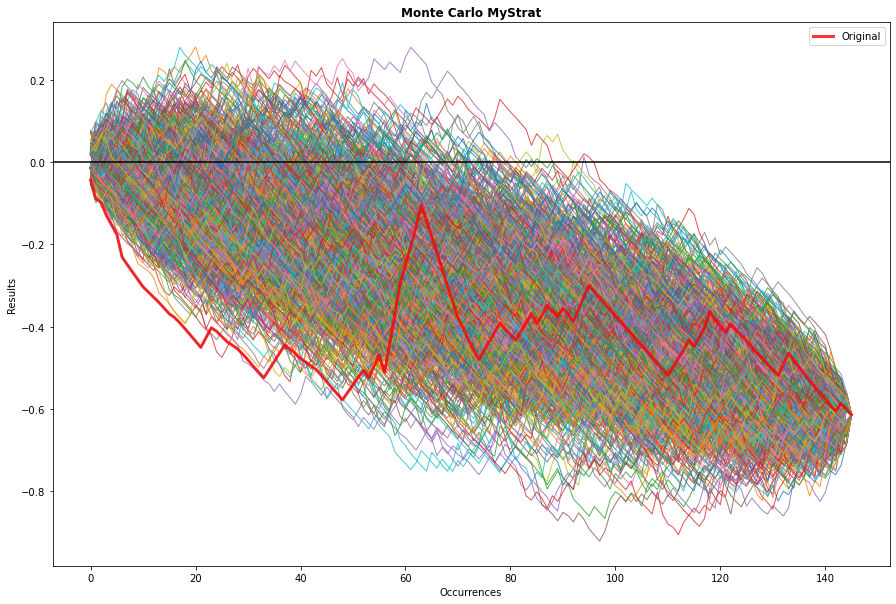

Estadisticas de la simulación: {'min': -0.6133479048440825, 'max': -0.6133479048440825, 'mean': -0.6133479048440882, 'median': -0.6133479048440825, 'std': 5.664970619373595e-15, 'maxdd': -0.9204767129652641, 'bust': 1.0, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.9204767129652641, 'max': -0.6133479048440825, 'mean': -0.6603449755494029, 'median': -0.641645714201191, 'std': 0.05261073964857622}
 Montecarlo run 7: None


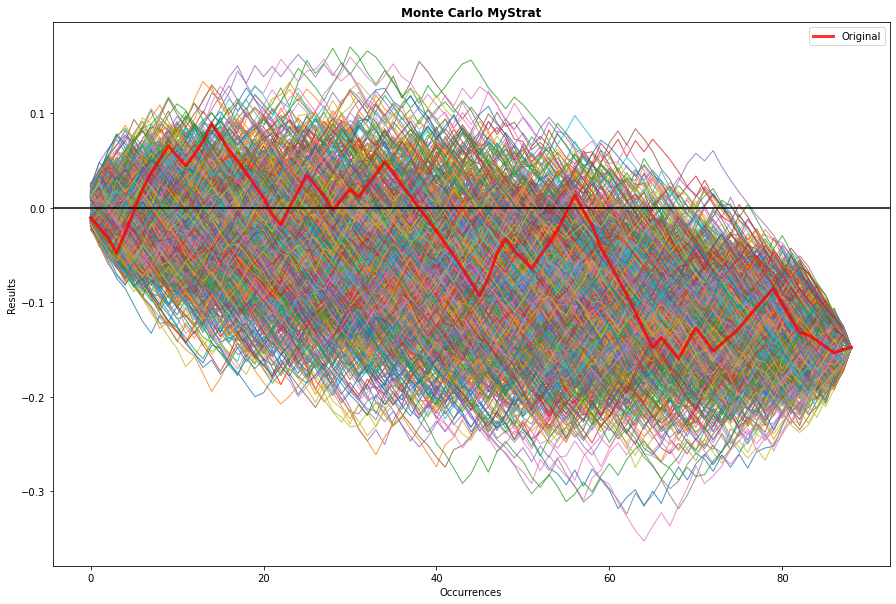

Estadisticas de la simulación: {'min': -0.1480680033081877, 'max': -0.1480680033081877, 'mean': -0.14806800330818692, 'median': -0.1480680033081877, 'std': 7.775449869728463e-16, 'maxdd': -0.3530977981388205, 'bust': 1.0, 'goal': 0.0}
Estadisticas DD Max: {'min': -0.3530977981388205, 'max': -0.1480680033081877, 'mean': -0.18139888081805, 'median': -0.17405219797481525, 'std': 0.03203342452840113}
 Montecarlo run 8: None


In [17]:
print(f' Montecarlo run 1: {montecarlo(stats[0])}')
print(f' Montecarlo run 2: {montecarlo(stats[1])}')
print(f' Montecarlo run 3: {montecarlo(stats[2])}')
print(f' Montecarlo run 4: {montecarlo(stats[3])}')
print(f' Montecarlo run 5: {montecarlo(stats[4])}')
print(f' Montecarlo run 6: {montecarlo(stats[5])}')
print(f' Montecarlo run 7: {montecarlo(stats[6])}')
print(f' Montecarlo run 8: {montecarlo(stats[7])}')

## OPTIMIZACIÓN FINAL PARA FUTURO

In [18]:
bt_last_training = Backtest(df.iloc[-lookback_bars - warmup_bars : ], MyStrat, cash = 1000000, commission = 0.0006, trade_on_close = True, hedging = True)
bt_last_training.run()

stats_last_training_optimized = bt_last_training.optimize(
                            rsi_window = range(2, 14, 2),
                            ob = range(65, 95, 5),
                            os = range(5, 35, 5),
                            slatrratio = list(np.arange(1.5, 3.0, 0.5)),
                            tpslratio = list(np.arange(1.5, 4.0, 0.5)),
                            maximize = 'Calmar Ratio')



/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 3240 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/12 [00:00<?, ?it/s]

In [19]:
print(stats_last_training_optimized)
print('--'*80)
print(stats_last_training_optimized._strategy)

Start                     2021-12-31 01:59...
End                       2022-10-17 00:59...
Duration                    289 days 23:00:00
Exposure Time [%]                   12.744253
Equity Final [$]               1008701.402756
Equity Peak [$]                1012022.385218
Return [%]                            0.87014
Buy & Hold Return [%]               -59.20295
Return (Ann.) [%]                    1.092618
Volatility (Ann.) [%]                1.089836
Sharpe Ratio                         1.002553
Sortino Ratio                        1.904054
Calmar Ratio                         2.006158
Max. Drawdown [%]                   -0.544632
Avg. Drawdown [%]                   -0.084888
Max. Drawdown Duration      119 days 11:00:00
Avg. Drawdown Duration        8 days 18:00:00
# Trades                                   72
Win Rate [%]                        44.444444
Best Trade [%]                      10.022811
Worst Trade [%]                     -4.299615
Avg. Trade [%]                    

## Graficación de training vs test data

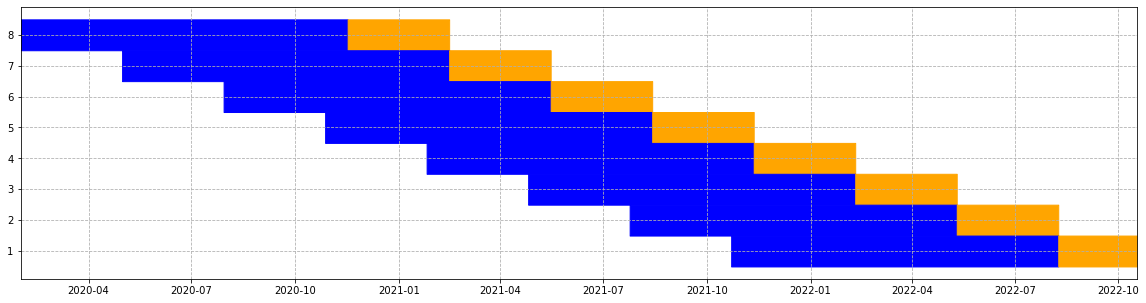

In [20]:

def plot_flow_graph(data, lookback_bars, validation_bars):
    ranges = list(range(lookback_bars, len(data), validation_bars))
    
    fig,ax = plt.subplots(figsize = (20,5))
    
    for i in range(len(ranges)):
        training_data = data.iloc[ranges[i] - lookback_bars : ranges[i]]
        validation_data = data.iloc[ranges[i] : ranges[i] + validation_bars]
        
        plt.fill_between(training_data.index, 
                         [len(ranges) - i - 0.5] * len(training_data.index),
                         [len(ranges) - i + 0.5] * len(training_data.index),
                         color = 'blue')
        
        plt.fill_between(validation_data.index, 
                         [len(ranges) - i - 0.5] * len(validation_data.index),
                         [len(ranges) - i + 0.5] * len(validation_data.index),
                         color = 'orange')
    
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.grid(visible=True, linestyle='--')
    plt.xlim(data.index[0], data.index[-1])
    plt.show()
    
plot_flow_graph(df, lookback_bars= lookback_bars, validation_bars = validation_bars)

## Graficación de un resultado especificado

In [34]:
# def plot_stats(data, statistics):
    
#     equity_curve = statistics._equity_curve
#     aligned_data = data.reindex(equity_curve.index)
    
#     bt = Backtest(aligned_data, MyStrat, cash=1000000, margin=1/99, commission = 0.0006, trade_on_close=True, hedging=True)
#     bt.plot(results = statistics)
    
# plot_stats(df, stats[0])

## Graficación full equity curve de todos los test de validación

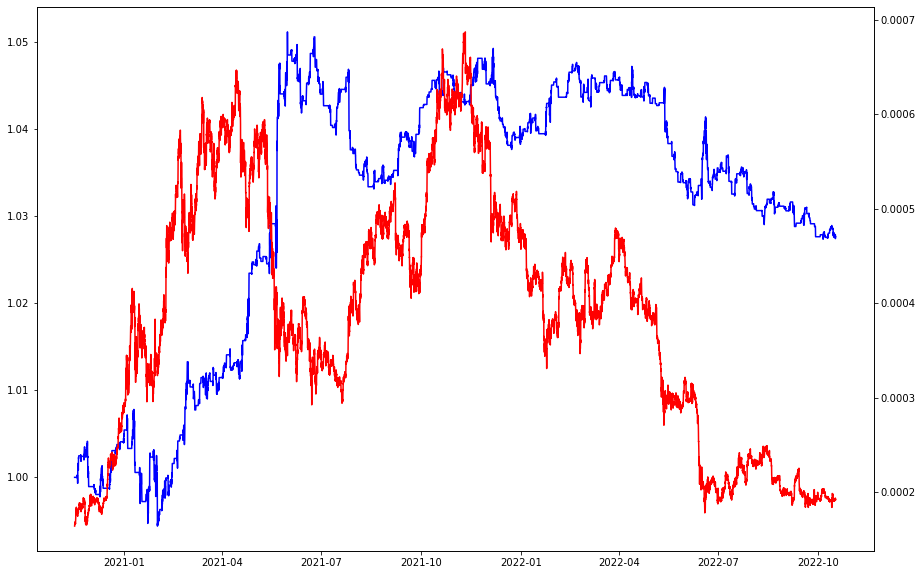

time
2020-11-16 14:59:59.999    1.000000
2020-11-16 15:59:59.999    1.000000
2020-11-16 16:59:59.999    1.000000
2020-11-16 17:59:59.999    1.000000
2020-11-16 18:59:59.999    1.000000
                             ...   
2022-10-16 20:59:59.999    1.027787
2022-10-16 21:59:59.999    1.027417
2022-10-16 22:59:59.999    1.027725
2022-10-16 23:59:59.999    1.027648
2022-10-17 00:59:59.999    1.027648
Name: Equity, Length: 16787, dtype: float64


In [21]:
def plot_full_EC(data, stats_list, warmup_bars, lookback_bars):
    equity_curves = [x['_equity_curve'].iloc[warmup_bars:] for x in stats_list]
    
    combined = pd.Series()
    for curve in equity_curves:
        if len(combined) == 0:
            combined = curve['Equity']/1e6 # 1e6 es la cantidad de cash que puse en el WF
        else:
            combined = pd.concat([combined, (curve['Equity']/1e6)*combined.iloc[-1]])
    
    aligned_price_data = data[data.index <= combined.index[-1]].iloc[lookback_bars + warmup_bars:]
    
    fig, ax1 = plt.subplots(figsize = (15,10))
    ax1.plot(combined.index, combined, color = 'blue')
    
    ax2 = ax1.twinx()
    ax2.plot(aligned_price_data.index, aligned_price_data.Close, color = 'red')
    
    plt.show()
    print(combined)
    
plot_full_EC(df, stats, warmup_bars=warmup_bars, lookback_bars=lookback_bars)

## DRAWDOWN ACUMULADO DE TODOS LOS OOS DEL WF

[-1.3295639671239923, -0.5462771864366611, -1.6921486963971444, -0.40525683652025135, -1.106797723397035, -0.48922443813436134, -1.3552810975381302, -0.5289444978148206]


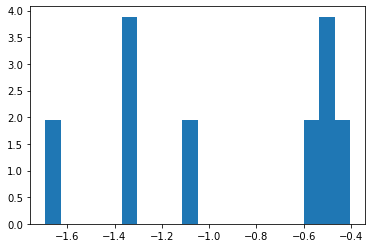

In [22]:
dd_max = [x['Max. Drawdown [%]'] for x in stats]
print(dd_max)
plt.hist(dd_max, density=True, bins=20)
# plt.ylabel('dd_max')
# plt.xlabel('%')
plt.show()